In [1]:
import tensorflow as tf
import os
import zipfile
import random
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

#from google.colab import files
from keras.preprocessing import image


nrows = 4
ncols = 4

pic_index = 0 

In [7]:
tf.config.set_visible_devices([], 'GPU')
#tf.debugging.set_log_device_placement(True)
"G:\python NN code+data\male_female_data\Training"

In [3]:
print(len(os.listdir("G:\python NN code+data\male_female_data\Training")))
print(len(os.listdir("G:\python NN code+data\male_female_data\Validation")))


2
2


In [1]:
train_dir="G:\python NN code+data\male_female_data\Training"
#print(len(os.listdir(train_dir)))
train_datagen=ImageDataGenerator(rescale=1.0/255.)
train_generator=train_datagen.flow_from_directory(train_dir,
                                                 batch_size=100,
                                                 class_mode='binary',
                                                 target_size=(150,150))


NameError: name 'ImageDataGenerator' is not defined

In [5]:
test_dir="G:\python NN code+data\male_female_data\Validation"
#print(len(os.listdir(test_dir)))
test_datagen=ImageDataGenerator(rescale=1.0/255.)
test_generator=test_datagen.flow_from_directory(test_dir,
                                                 batch_size=100,
                                                 class_mode='binary',
                                                 target_size=(150,150))

Found 11637 images belonging to 2 classes.


In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [14]:
train_male_fnames = os.listdir(os.path.join(train_dir,'male') )
train_female_fnames = os.listdir( os.path.join(train_dir,'female') )
# Directory with our training cat/dog pictures
train_male_dir = os.path.join(train_dir, 'male')
train_female_dir = os.path.join(train_dir, 'female')

print(train_female_fnames[:10])
print(train_male_fnames[:10])

['131422.jpg.jpg', '131423.jpg.jpg', '131425.jpg.jpg', '131427.jpg.jpg', '131428.jpg.jpg', '131429.jpg.jpg', '131432.jpg.jpg', '131433.jpg.jpg', '131435.jpg.jpg', '131437.jpg.jpg']
['063549.jpg.jpg', '063604.jpg.jpg', '090544.jpg.jpg', '090545.jpg.jpg', '090548.jpg.jpg', '090550.jpg.jpg', '090553.jpg.jpg', '090557.jpg.jpg', '090558.jpg.jpg', '090559.jpg.jpg']


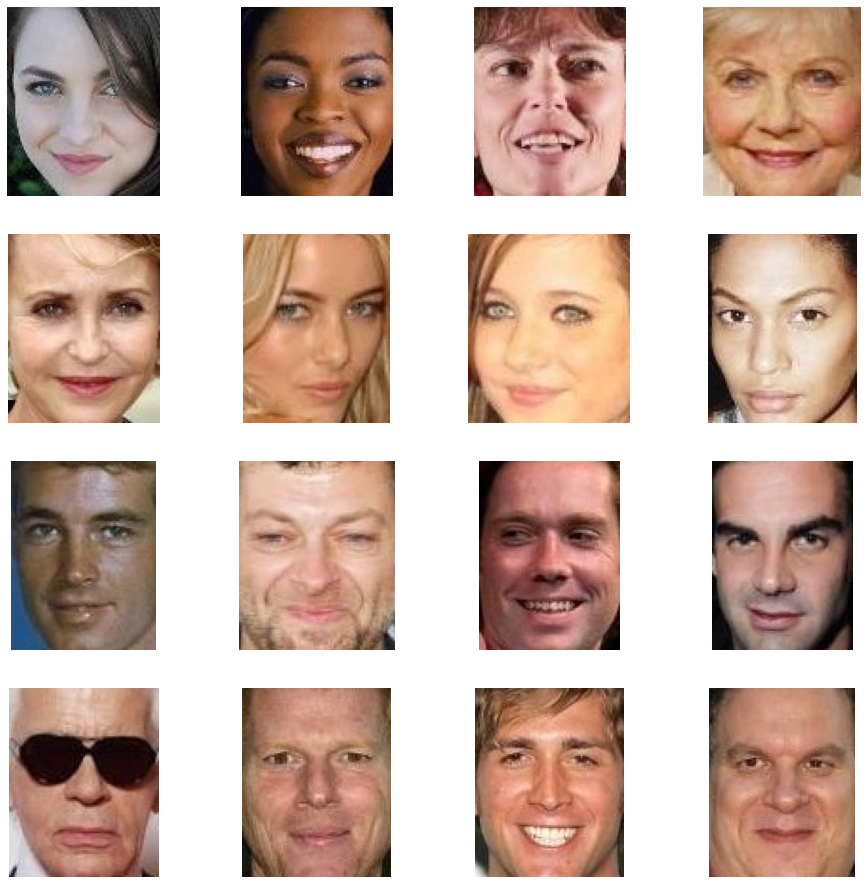

In [15]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_female_pix = [os.path.join(train_female_dir, fname) 
                for fname in train_female_fnames[ pic_index-8:pic_index] 
               ]

next_male_pix = [os.path.join(train_male_dir, fname) 
                for fname in train_male_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_female_pix+next_male_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [6]:
model = tf.keras.models.Sequential([ #layer 1
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3),use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.001)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                   #layer 2
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.001)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #layer 3
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.001)), 
                                    tf.keras.layers.MaxPooling2D(2,2),
    
                                    tf.keras.layers.Flatten(),  #Flatten the result and fit them into Dense Neural network
                                    #layer 4
                                    tf.keras.layers.Dense(2048, activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.001)), #Dense layer
                                    tf.keras.layers.Dense(1024, activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.001)), #Dense layer with 1024 hidden units
                                    tf.keras.layers.Dense(512, activation='relu',use_bias=True,kernel_regularizer =tf.keras.regularizers.l2( l=0.001)), #Dense layer with 512 hidden units

                                    #only one output unti due to binary classifaction,
                                    #layer 5
                                    tf.keras.layers.Dense(1, activation='sigmoid',use_bias=True)  

])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [1]:
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

NameError: name 'model' is not defined

In [10]:
history = model.fit(train_generator,
                              epochs=30,
                              steps_per_epoch=470,  
                              verbose=1,
                              validation_data=test_generator)
    

Epoch 1/30
470/470 [==============================] - 1684s 4s/step - loss: 0.8544 - acc: 0.7493 - val_loss: 0.3670 - val_acc: 0.8901
Epoch 2/30
470/470 [==============================] - 1165s 2s/step - loss: 0.3368 - acc: 0.9008 - val_loss: 0.2616 - val_acc: 0.9335
Epoch 3/30
470/470 [==============================] - 1175s 3s/step - loss: 0.2700 - acc: 0.9261 - val_loss: 0.3737 - val_acc: 0.8757
Epoch 4/30
470/470 [==============================] - 1236s 3s/step - loss: 0.2390 - acc: 0.9365 - val_loss: 0.1833 - val_acc: 0.9558
Epoch 5/30
470/470 [==============================] - 1225s 3s/step - loss: 0.2167 - acc: 0.9433 - val_loss: 0.1818 - val_acc: 0.9561
Epoch 6/30
470/470 [==============================] - 1242s 3s/step - loss: 0.2027 - acc: 0.9496 - val_loss: 0.3369 - val_acc: 0.9004
Epoch 7/30
470/470 [==============================] - 1147s 2s/step - loss: 0.1922 - acc: 0.9526 - val_loss: 0.2053 - val_acc: 0.9472
Epoch 8/30
470/470 [==============================] - 1258s 3s

Text(0.5, 1.0, 'Training and validation loss')

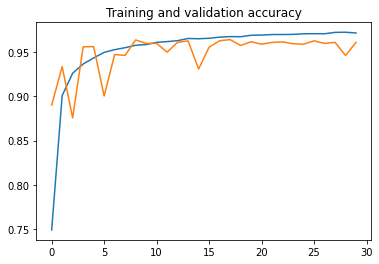

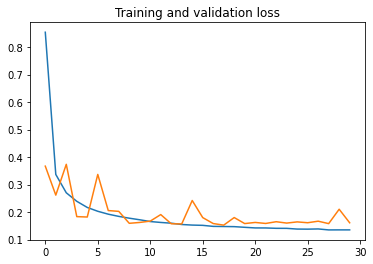

In [35]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]


epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [12]:
model.evaluate(test_generator)

117/117 [==============================] - 70s 600ms/step - loss: 0.1608 - acc: 0.9609


[0.16083912551403046, 0.960900604724884]

In [34]:
model.save('male_female.h5')